<a href="https://colab.research.google.com/github/pemindi/Team-Tech-Divas/blob/main/Team_Tech_Divas_(Case_A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of intersections (N): 100
Enter the number of roads (M): 500
Enter the number of delivery points (K): 50
Shortest delivery times to K delivery points: {55: 4, 92: 3, 24: 4, 20: 14, 49: 9, 36: 1, 8: 13, 39: 3, 7: 6, 89: 8, 93: 10, 57: 8, 47: 11, 26: 9, 87: 8, 21: 10, 85: 12, 90: 11, 74: 8, 43: 10, 5: 6, 98: 10, 99: 7, 27: 5, 13: 10, 79: 9, 82: 14, 76: 12, 2: 12, 48: 10, 6: 4, 83: 9, 69: 5, 95: 7, 78: 8, 70: 3, 45: 11, 97: 10, 40: 11, 30: 5, 59: 10, 94: 2, 64: 12, 77: 8, 52: 8, 62: 9, 11: 11, 68: 6, 34: 12, 15: 6}
Time taken for Dijkstra's algorithm: 0.0008 seconds


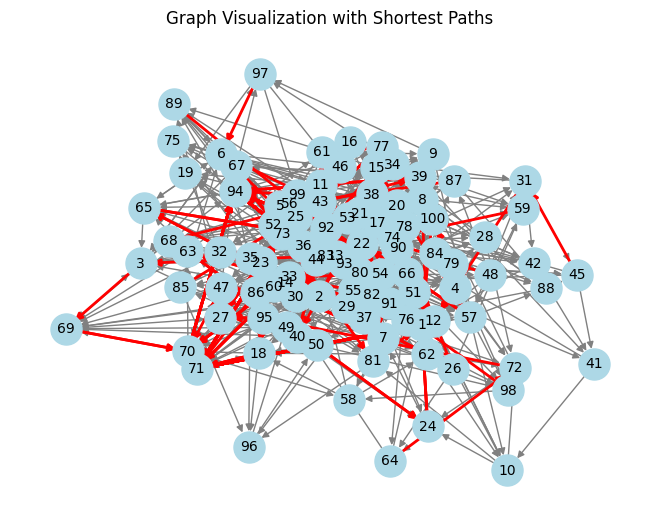

Time taken for visualization: 5.1204 seconds


In [6]:
import heapq
import random
import matplotlib.pyplot as plt
import networkx as nx
import time

def dijkstra(graph, N, start_node, delivery_points):
    # Implements Dijkstra's algorithm to find the shortest paths from a start node.
    dist = {i: float('inf') for i in range(1, N + 1)}
    dist[start_node] = 0

    priority_queue = [(0, start_node)]  # (distance, node)
    heapq.heapify(priority_queue)
    visited = set()
    found_delivery_points = set()
    parent = {start_node: None}  # To reconstruct paths

    while priority_queue:
        current_dist, current_node = heapq.heappop(priority_queue)

        if current_node in delivery_points:
            found_delivery_points.add(current_node)
            if len(found_delivery_points) == len(delivery_points):
                break

        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor, weight in graph[current_node]:
            distance = current_dist + weight
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                parent[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return {point: dist[point] for point in delivery_points}, parent

def generate_random_graph(N, M):
    # Generates a connected random graph with N nodes and M edges.
    # Ensures the graph is connected and roads are unidirectional.

    if M < N - 1:
        raise ValueError("Number of edges (M) must be at least N-1 to ensure connectivity.")

    graph = {i: [] for i in range(1, N + 1)}
    edges = set()

    # Step 1: Create a spanning tree to ensure connectivity
    nodes = list(range(1, N + 1))
    random.shuffle(nodes)
    for i in range(N - 1):
        u, v = nodes[i], nodes[i + 1]
        delay = random.randint(1, 10)
        graph[u].append((v, delay))
        edges.add((u, v))

    # Step 2: Add remaining random edges
    while len(edges) < M:
        u = random.randint(1, N)
        v = random.randint(1, N)
        if u != v and (u, v) not in edges:
            delay = random.randint(1, 10)
            graph[u].append((v, delay))
            edges.add((u, v))

    return graph

def visualize_graph(graph, parent, delivery_points, start_node):
    # Visualizes the graph and highlights the shortest paths.
    G = nx.DiGraph()

    # Add edges to the graph
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G, seed=42)  # Layout for consistent graph visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

    # Highlight shortest paths
    for delivery_point in delivery_points:
        if delivery_point in parent:
            path = []
            current = delivery_point
            while current is not None:
                path.append(current)
                current = parent[current]
            path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Graph Visualization with Shortest Paths")
    plt.show()

# Input from the user with validation
while True:
    try:
        N = int(input("Enter the number of intersections (N): "))
        if N > 10 ** 5:
            raise ValueError("The number of intersections (N) must be <= 10^5.")

        M = int(input("Enter the number of roads (M): "))
        if M > 10 ** 5:
            raise ValueError("The number of roads (M) must be <= 10^5.")
        if M < N - 1:
            raise ValueError("The number of roads (M) must be at least N-1 to ensure connectivity.")

        K = int(input("Enter the number of delivery points (K): "))
        if K >= N:
            raise ValueError("The number of delivery points (K) should be less than the number of intersections (N).")

        break  # Exit the loop if inputs are valid
    except ValueError as e:
        print(f"Input Error: {e}")
        print("Please try again.\n")

# Generate a connected random graph
graph = generate_random_graph(N, M)

# Randomly select K delivery points
K_delivery_points = random.sample(range(1, N + 1), K)

# Measure time for Dijkstra's algorithm
start_time = time.time()
distances, parent = dijkstra(graph, N, start_node=1, delivery_points=K_delivery_points)
dijkstra_time = time.time() - start_time

# Output the shortest delivery times to the K delivery points
print("Shortest delivery times to K delivery points:", distances)
print(f"Time taken for Dijkstra's algorithm: {dijkstra_time:.4f} seconds")

# Measure time for visualization
start_time = time.time()
visualize_graph(graph, parent, K_delivery_points, start_node=1)
visualization_time = time.time() - start_time

print(f"Time taken for visualization: {visualization_time:.4f} seconds")


In [ ]:
# Input from the user with validation
while True:
    try:
        N = int(input("Enter the number of intersections (N): "))
        if N > 10 ** 5:
            raise ValueError("The number of intersections (N) must be <= 10^5.")

        M = int(input("Enter the number of roads (M): "))
        if M > 10 ** 5:
            raise ValueError("The number of roads (M) must be <= 10^5.")
        if M < N - 1:
            raise ValueError("The number of roads (M) must be at least N-1 to ensure connectivity.")

        K = int(input("Enter the number of delivery points (K): "))
        if K >= N:
            raise ValueError("The number of delivery points (K) should be less than the number of intersections (N).")

        break  # Exit the loop if inputs are valid
    except ValueError as e:
        print(f"Input Error: {e}")
        print("Please try again.\n")

# Generate a connected random graph
graph = generate_random_graph(N, M)

# Randomly select K delivery points
K_delivery_points = random.sample(range(1, N + 1), K)

# Measure time for Dijkstra's algorithm
start_time = time.time()
distances, parent = dijkstra(graph, N, start_node=1, delivery_points=K_delivery_points)
dijkstra_time = time.time() - start_time

# Output the shortest delivery times to the K delivery points
print("Shortest delivery times to K delivery points:", distances)
print(f"Time taken for Dijkstra's algorithm: {dijkstra_time:.4f} seconds")

# Measure time for visualization
start_time = time.time()
visualize_graph(graph, parent, K_delivery_points, start_node=1)
visualization_time = time.time() - start_time

print(f"Time taken for visualization: {visualization_time:.4f} seconds")


Enter the number of intersections (N): 100000
Enter the number of roads (M): 100000
Enter the number of delivery points (K): 10000
Shortest delivery times to K delivery points: {83898: 16593, 68228: 244130, 6912: 21121, 68908: 167089, 33567: inf, 32473: 152259, 73191: 210504, 71237: inf, 66819: inf, 20265: 146506, 70970: 229506, 36231: 19595, 26250: 8712, 94198: 187326, 39678: 245571, 22311: 187312, 8786: 220808, 7281: 137963, 56534: 288875, 69112: 103907, 73892: inf, 39470: 32794, 19340: 211739, 39967: 38931, 8238: 41878, 49661: 154073, 36915: 139610, 99464: inf, 88207: 58326, 96861: 217182, 8686: 218824, 8728: inf, 32593: 33797, 68983: 60838, 95496: 186495, 77657: 97081, 75750: 131634, 28545: inf, 26157: 206799, 76286: 259269, 497: 130101, 42669: inf, 47659: 77762, 3196: 78954, 47034: 185216, 46433: inf, 64177: inf, 88639: 293414, 99930: 112702, 25949: 114635, 85731: 199783, 94983: 170643, 45970: inf, 69282: 93548, 65249: 147680, 80356: 190039, 42444: 177639, 10944: 32028, 17502: 135